In [1]:
#https://journalofbigdata.springeropen.com/articles/10.1186/s40537-018-0138-3
#https://github.com/lkuzz/Medicare-Part-D-Analysis/blob/master/Data%20Processing.ipynb
#https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/Prescriber_Methods.pdf
#https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/Prescriber_Methods.pdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Part D data can be considered to provide procedure-level information.
my_list = []
for chunk in  pd.read_csv(r'D:\Data _Science\IndependentResearch\provider_charge_data\Medicare_Part_D_Prescribers_by_Provider_and_Drug_2019_12_31\Medicare_Part_D_Prescribers_by_Provider_and_Drug_2019_12_31.csv', chunksize=20000,encoding='latin-1',low_memory=False, error_bad_lines = False):
    my_list.append(chunk)


In [3]:
df= pd.concat(my_list, axis= 0)

In [4]:
df.head()

,Prscrbr_NPI,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_City,Prscrbr_State_Abrvtn,Prscrbr_State_FIPS,Prscrbr_Type,Prscrbr_Type_Src,Brnd_Name,Gnrc_Name,...,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes,GE65_Sprsn_Flag,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Bene_Sprsn_Flag,GE65_Tot_Benes
0,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Amiodarone Hcl,Amiodarone Hcl,...,360,150.76,NaN,NaN,13.0,13.0,150.76,360.0,*,NaN
1,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Amlodipine Besylate,Amlodipine Besylate,...,780,92.81,12.0,NaN,22.0,26.0,92.81,780.0,NaN,12.0
2,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Atorvastatin Calcium,Atorvastatin Calcium,...,1482,373.60,22.0,NaN,41.0,50.0,373.60,1482.0,NaN,22.0
3,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Azithromycin,Azithromycin,...,77,132.57,15.0,#,NaN,NaN,NaN,NaN,#,NaN
4,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Carvedilol,Carvedilol,...,787,118.53,11.0,NaN,21.0,27.0,118.53,787.0,NaN,11.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25401870 entries, 0 to 25401869
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Prscrbr_NPI            int64  
 1   Prscrbr_Last_Org_Name  object 
 2   Prscrbr_First_Name     object 
 3   Prscrbr_City           object 
 4   Prscrbr_State_Abrvtn   object 
 5   Prscrbr_State_FIPS     object 
 6   Prscrbr_Type           object 
 7   Prscrbr_Type_Src       object 
 8   Brnd_Name              object 
 9   Gnrc_Name              object 
 10  Tot_Clms               int64  
 11  Tot_30day_Fills        float64
 12  Tot_Day_Suply          int64  
 13  Tot_Drug_Cst           float64
 14  Tot_Benes              float64
 15  GE65_Sprsn_Flag        object 
 16  GE65_Tot_Clms          float64
 17  GE65_Tot_30day_Fills   float64
 18  GE65_Tot_Drug_Cst      float64
 19  GE65_Tot_Day_Suply     float64
 20  GE65_Bene_Sprsn_Flag   object 
 21  GE65_Tot_Benes         float64
dtypes: float64(8), i

In [6]:
df.describe()

,Prscrbr_NPI,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Tot_Benes
count,2.540187e+07,2.540187e+07,2.540187e+07,2.540187e+07,2.540187e+07,1.070614e+07,1.402100e+07,1.402100e+07,1.402100e+07,1.402100e+07,2.589094e+06
mean,1.499506e+09,5.097666e+01,8.669875e+01,2.433167e+03,5.394291e+03,3.012260e+01,4.962052e+01,8.759334e+01,4.886409e+03,2.487666e+03,3.333644e+01
std,2.877596e+08,1.272163e+02,1.845877e+02,4.700585e+03,3.749361e+04,1.039127e+02,1.488382e+02,2.084941e+02,3.666938e+04,5.024198e+03,1.961413e+02
min,1.003000e+09,1.100000e+01,1.100000e+01,1.000000e+01,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.245673e+09,1.500000e+01,2.100000e+01,4.800000e+02,2.621900e+02,1.400000e+01,1.300000e+01,1.800000e+01,2.248300e+02,4.250000e+02,1.300000e+01
50%,1.497925e+09,2.400000e+01,3.800000e+01,1.020000e+03,6.713800e+02,2.000000e+01,2.200000e+01,3.600000e+01,6.200600e+02,9.900000e+02,1.900000e+01
75%,1.740720e+09,5.000000e+01,8.200000e+01,2.310000e+03,2.161750e+03,3.300000e+01,4.700000e+01,8.000000e+01,2.035420e+03,2.250000e+03,3.400000e+01
max,1.993000e+09,1.993870e+05,2.047677e+05,6.066460e+05,3.343712e+07,1.418610e+05,1.906370e+05,1.957407e+05,3.196401e+07,5.928350e+05,1.355460e+05


## 1. Inspecting the null % 

In [7]:
colnames=(df.isnull().sum()*100/len(df)) 
colnames

Prscrbr_NPI               0.000000
Prscrbr_Last_Org_Name     0.000000
Prscrbr_First_Name        0.000000
Prscrbr_City              0.000000
Prscrbr_State_Abrvtn      0.000000
Prscrbr_State_FIPS        0.000000
Prscrbr_Type              0.000008
Prscrbr_Type_Src          0.000000
Brnd_Name                 0.000000
Gnrc_Name                 0.000000
Tot_Clms                  0.000000
Tot_30day_Fills           0.000000
Tot_Day_Suply             0.000000
Tot_Drug_Cst              0.000000
Tot_Benes                57.852938
GE65_Sprsn_Flag          55.196728
GE65_Tot_Clms            44.803272
GE65_Tot_30day_Fills     44.803272
GE65_Tot_Drug_Cst        44.803272
GE65_Tot_Day_Suply       44.803272
GE65_Bene_Sprsn_Flag     10.192533
GE65_Tot_Benes           89.807467
dtype: float64

### Inference 
- Tot_Benes                57.852938
- GE65_Sprsn_Flag          55.196728
- GE65_Tot_Clms            44.803272
- GE65_Tot_30day_Fills     44.803272
- GE65_Tot_Drug_Cst        44.803272
- GE65_Tot_Day_Suply       44.803272
- GE65_Bene_Sprsn_Flag     10.192533
- GE65_Tot_Benes           89.807467

GE65_Tot_Benes seems to have a lot of nulls this column might not be of use . 



In [8]:
cat_vals = df.select_dtypes(include=['object']).columns
cat_vals=cat_vals.to_list()
cat_vals

['Prscrbr_Last_Org_Name',
 'Prscrbr_First_Name',
 'Prscrbr_City',
 'Prscrbr_State_Abrvtn',
 'Prscrbr_State_FIPS',
 'Prscrbr_Type',
 'Prscrbr_Type_Src',
 'Brnd_Name',
 'Gnrc_Name',
 'GE65_Sprsn_Flag',
 'GE65_Bene_Sprsn_Flag']

Total number of rows in the dataset is 25,401,869. which is impossible to process with local resources as it almost consumes 4.2 gb of data.
So taking a saple from the dataset.100,000 records

In [9]:
df_subset= df.sample(n=100000) ## it performs a random sampling 

In [10]:
colnames=(df_subset.isnull().sum()*100/len(df_subset)) 
colnames

Prscrbr_NPI               0.000
Prscrbr_Last_Org_Name     0.000
Prscrbr_First_Name        0.000
Prscrbr_City              0.000
Prscrbr_State_Abrvtn      0.000
Prscrbr_State_FIPS        0.000
Prscrbr_Type              0.000
Prscrbr_Type_Src          0.000
Brnd_Name                 0.000
Gnrc_Name                 0.000
Tot_Clms                  0.000
Tot_30day_Fills           0.000
Tot_Day_Suply             0.000
Tot_Drug_Cst              0.000
Tot_Benes                57.920
GE65_Sprsn_Flag          54.971
GE65_Tot_Clms            45.029
GE65_Tot_30day_Fills     45.029
GE65_Tot_Drug_Cst        45.029
GE65_Tot_Day_Suply       45.029
GE65_Bene_Sprsn_Flag     10.093
GE65_Tot_Benes           89.907
dtype: float64

The sample dataset almost has the similar number of the null values, we can use that for our inference building and
can run the entire dataset once the cloud environment is available 

In [67]:
## deleting the bigger dataframe now as it is causing system crash 
#import gc
#del [[df]]
#gc.collect()

69908

## Value Counts to see how the Data is spread into categories 

In [19]:
cat_vals

['Prscrbr_Last_Org_Name',
 'Prscrbr_First_Name',
 'Prscrbr_City',
 'Prscrbr_State_Abrvtn',
 'Prscrbr_State_FIPS',
 'Prscrbr_Type',
 'Prscrbr_Type_Src',
 'Brnd_Name',
 'Gnrc_Name',
 'GE65_Sprsn_Flag',
 'GE65_Bene_Sprsn_Flag']

In [27]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [29]:
for val in cat_vals:
    df_subset[val].value_counts(dropna=False)
    

Smith                 597
Patel                 551
Johnson               381
Lee                   373
Miller                333
                     ... 
Bridgman                1
Fehrenbach Wolfson      1
Dirk                    1
Lourenco                1
Lawrenz                 1
Name: Prscrbr_Last_Org_Name, Length: 40500, dtype: int64

Michael           1930
John              1818
David             1735
Robert            1507
James             1426
                  ... 
Sattar               1
Ghada                1
Virgen               1
Boaz                 1
Maria Kristina       1
Name: Prscrbr_First_Name, Length: 14352, dtype: int64

New York               923
Brooklyn               741
Houston                716
Chicago                649
Los Angeles            623
                      ... 
Honokaa                  1
Dry Ridge                1
Chiang Mai               1
South El Monte           1
La Grange Highlands      1
Name: Prscrbr_City, Length: 7038, dtype: int64

CA    9377
FL    6806
NY    6748
TX    6462
PA    5049
OH    4091
MI    3609
NC    3575
IL    3429
GA    2940
NJ    2657
TN    2646
MA    2420
IN    2247
MO    2182
VA    2178
WA    1993
KY    1896
WI    1870
MN    1764
AZ    1736
AL    1670
SC    1648
LA    1579
MD    1463
CO    1361
PR    1315
OR    1309
OK    1233
CT    1182
AR    1159
IA    1144
MS    1005
KS     937
WV     775
NV     678
NE     626
UT     566
ME     549
NM     541
ID     490
NH     488
MT     390
RI     378
DE     319
SD     308
HI     274
ND     246
VT     216
DC     154
WY     151
AK     130
VI      20
GU      10
ZZ       5
AE       2
AP       2
MP       1
AA       1
Name: Prscrbr_State_Abrvtn, dtype: int64

6     8087
12    5789
36    5696
48    5535
42    4322
      ... 
9C       2
9B       2
78       1
69       1
9A       1
Name: Prscrbr_State_FIPS, Length: 112, dtype: int64

Family Practice                             27297
Internal Medicine                           24042
Nurse Practitioner                          15133
Physician Assistant                          6213
Cardiology                                   3023
                                            ...  
Midwife                                         1
Naprapath                                       1
Counselor                                       1
Religious Nonmedical Nursing Personnel          1
Medical Genetics, Ph.D. Medical Genetics        1
Name: Prscrbr_Type, Length: 101, dtype: int64

S    98147
T     1853
Name: Prscrbr_Type_Src, dtype: int64

Atorvastatin Calcium    1283
Gabapentin              1232
Lisinopril              1174
Amlodipine Besylate     1134
Omeprazole              1081
                        ... 
Adderall                   1
Depo-Medrol                1
Evotaz                     1
Droplet Pen Needle         1
Hyzaar                     1
Name: Brnd_Name, Length: 1430, dtype: int64

Albuterol Sulfate       1440
Metformin Hcl           1422
Levothyroxine Sodium    1397
Atorvastatin Calcium    1288
Gabapentin              1241
                        ... 
Alogliptin Benzoate        1
Codeine Sulfate            1
Bosutinib                  1
Ibalizumab-Uiyk            1
Lithium Citrate            1
Name: Gnrc_Name, Length: 976, dtype: int64

NaN    54971
#      31053
*      13976
Name: GE65_Sprsn_Flag, dtype: int64

*      62414
#      27493
NaN    10093
Name: GE65_Bene_Sprsn_Flag, dtype: int64

## Inferences/notes
- “*” = Primary suppressed due to bene_count_ge65 between 1 and 10.
- “#” = Counter suppressed because the “less than 65 year old” group (not explicitly displayed)
    contains a beneficiary count between 1 and 10, which can be mathematically determined
    from bene_count_ge65 and bene_count.
    
    


## 2. Univariate Analysis numerical variables 

In [33]:
## Converting the float64 to float type 
df_subset['Tot_Clms']=df_subset['Tot_Clms'].astype(float)
df_subset['Tot_Day_Suply']=df_subset['Tot_Day_Suply'].astype(float)

In [34]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 5153867 to 3297812
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Prscrbr_NPI            100000 non-null  int64  
 1   Prscrbr_Last_Org_Name  100000 non-null  object 
 2   Prscrbr_First_Name     100000 non-null  object 
 3   Prscrbr_City           100000 non-null  object 
 4   Prscrbr_State_Abrvtn   100000 non-null  object 
 5   Prscrbr_State_FIPS     100000 non-null  object 
 6   Prscrbr_Type           100000 non-null  object 
 7   Prscrbr_Type_Src       100000 non-null  object 
 8   Brnd_Name              100000 non-null  object 
 9   Gnrc_Name              100000 non-null  object 
 10  Tot_Clms               100000 non-null  float64
 11  Tot_30day_Fills        100000 non-null  float64
 12  Tot_Day_Suply          100000 non-null  float64
 13  Tot_Drug_Cst           100000 non-null  float64
 14  Tot_Benes              42080 

In [35]:
num_vals = df_subset.select_dtypes(include=['float64']).columns
num_vals=num_vals.to_list()
num_vals

['Tot_Clms',
 'Tot_30day_Fills',
 'Tot_Day_Suply',
 'Tot_Drug_Cst',
 'Tot_Benes',
 'GE65_Tot_Clms',
 'GE65_Tot_30day_Fills',
 'GE65_Tot_Drug_Cst',
 'GE65_Tot_Day_Suply',
 'GE65_Tot_Benes']

count    100000.000000
mean         50.796290
std          98.701427
min          11.000000
25%          15.000000
50%          24.000000
70%          42.000000
75%          50.000000
max       11268.000000
Name: Tot_Clms, dtype: float64


Text(0.5, 1.0, 'Tot_Clms')

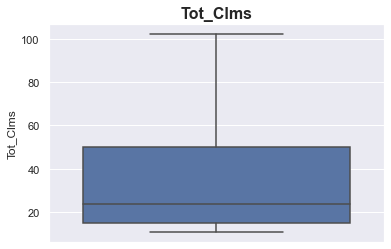

count    100000.000000
mean         86.489127
std         166.338791
min          11.000000
25%          21.000000
50%          38.000000
70%          67.000000
75%          82.000000
max       11270.800000
Name: Tot_30day_Fills, dtype: float64


Text(0.5, 1.0, 'Tot_30day_Fills')

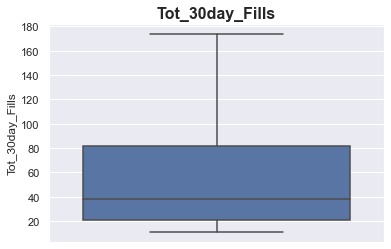

count    100000.000000
mean       2428.961120
std        4802.612252
min          11.000000
25%         480.000000
50%        1020.000000
70%        1890.000000
75%        2291.000000
max      292609.000000
Name: Tot_Day_Suply, dtype: float64


Text(0.5, 1.0, 'Tot_Day_Suply')

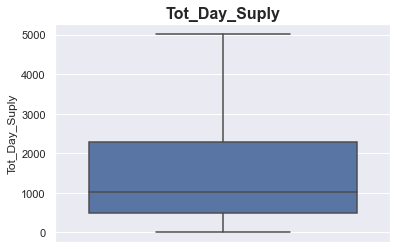

count    1.000000e+05
mean     5.440232e+03
std      3.767354e+04
min      8.700000e-01
25%      2.630800e+02
50%      6.750700e+02
70%      1.617720e+03
75%      2.203350e+03
max      4.636191e+06
Name: Tot_Drug_Cst, dtype: float64


Text(0.5, 1.0, 'Tot_Drug_Cst')

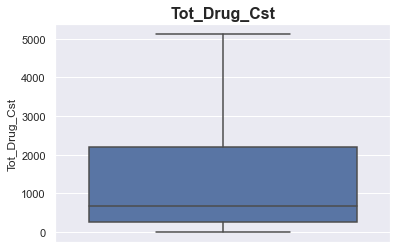

count    42080.000000
mean        29.833674
std         31.248334
min         11.000000
25%         14.000000
50%         20.000000
70%         29.000000
75%         33.000000
max        999.000000
Name: Tot_Benes, dtype: float64


Text(0.5, 1.0, 'Tot_Benes')

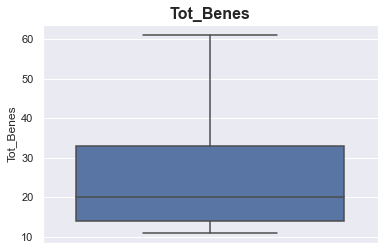

count    54971.000000
mean        49.638027
std        101.070761
min          0.000000
25%         13.000000
50%         22.000000
70%         38.000000
75%         47.000000
max       9771.000000
Name: GE65_Tot_Clms, dtype: float64


Text(0.5, 1.0, 'GE65_Tot_Clms')

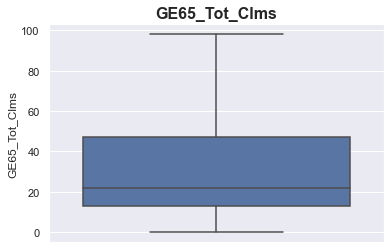

count    54971.000000
mean        88.000500
std        178.588146
min          0.000000
25%         18.000000
50%         36.000000
70%         65.000000
75%         80.000000
max       9773.700000
Name: GE65_Tot_30day_Fills, dtype: float64


Text(0.5, 1.0, 'GE65_Tot_30day_Fills')

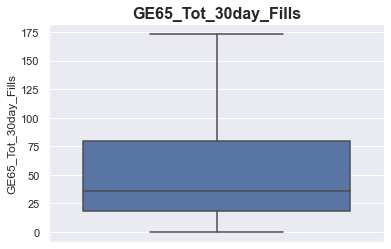

count    5.497100e+04
mean     4.912740e+03
std      3.235160e+04
min      0.000000e+00
25%      2.272850e+02
50%      6.264900e+02
70%      1.533000e+03
75%      2.083810e+03
max      2.907677e+06
Name: GE65_Tot_Drug_Cst, dtype: float64


Text(0.5, 1.0, 'GE65_Tot_Drug_Cst')

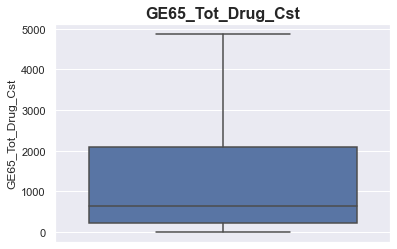

count     54971.000000
mean       2504.099343
std        5113.856569
min           0.000000
25%         425.000000
50%         990.000000
70%        1830.000000
75%        2250.000000
max      203560.000000
Name: GE65_Tot_Day_Suply, dtype: float64


Text(0.5, 1.0, 'GE65_Tot_Day_Suply')

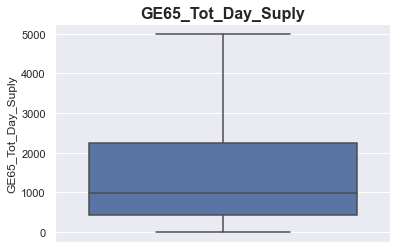

count    10093.000000
mean        32.399485
std         39.604552
min          0.000000
25%         13.000000
50%         19.000000
70%         29.000000
75%         34.000000
max        797.000000
Name: GE65_Tot_Benes, dtype: float64


Text(0.5, 1.0, 'GE65_Tot_Benes')

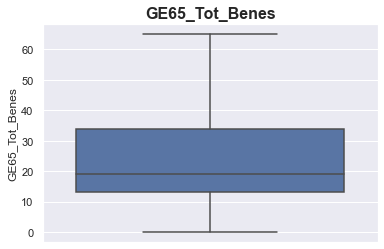

In [68]:
sns.set(style="darkgrid")
for vals in num_vals:
    print(df_subset[vals].describe(percentiles=[.25,.50,.70,.75]))
    ax = sns.boxplot(y=df_subset[vals],showfliers=False) ## keeping showfliers=False just to see the meadian value and the data distibution 
    plt.title(vals, weight='bold', FontSize = 16)
    plt.show();
    

## Inferences

## Univariate - categorical Variables

In [81]:
## copy the dataset and segrigate to see the spread by clubbing catagories with lessthan equalto 5% into group others 
df_cpy =df_subset.copy()

In [82]:
def Segrigate (Val,threshold =0.05):
    
    df_cpy[Val].value_counts(dropna=False,normalize=True)
    plt.figure(figsize=(5, 5))
    count_df= df_cpy[Val].value_counts(dropna=False,normalize=True)
    count_df=count_df.to_frame()
    count_df=count_df[count_df[Val]<threshold]
    to_replace= count_df.index
    to_replace
    df_cpy[Val] = df_cpy[Val].replace(to_replace, 'Others')
    df_cpy[Val] = df_cpy[Val].astype('object')
    df_cpy[Val].value_counts(dropna=False,normalize=True).plot(kind='bar',color='turquoise',legend=True,fontsize=11,grid=True);

In [83]:
cat_vals

['Prscrbr_Last_Org_Name',
 'Prscrbr_First_Name',
 'Prscrbr_City',
 'Prscrbr_State_Abrvtn',
 'Prscrbr_State_FIPS',
 'Prscrbr_Type',
 'Prscrbr_Type_Src',
 'Brnd_Name',
 'Gnrc_Name',
 'GE65_Sprsn_Flag',
 'GE65_Bene_Sprsn_Flag']